# Bootstrapping the Starcraft Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
starcraft = '../datasets/Starcraft_sample.csv'

In [3]:
star = pd.read_csv(starcraft)
print(star.shape)

(200, 20)


In [4]:
apm = star.APM.values

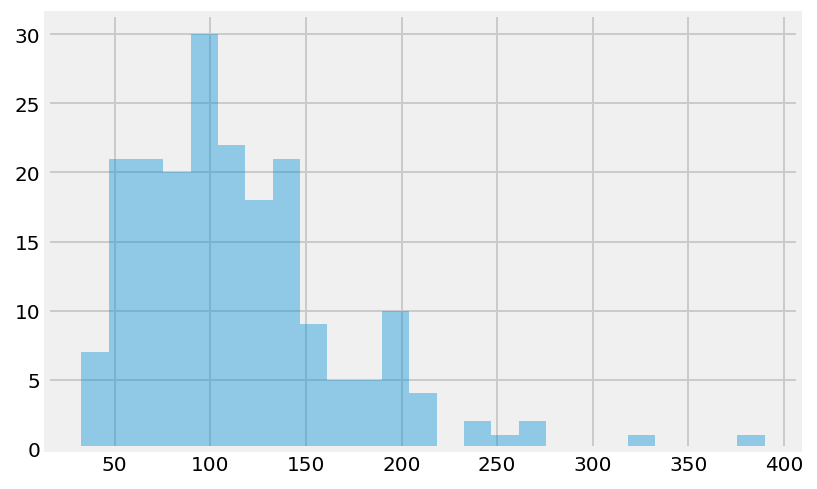

In [5]:
ax = sns.distplot(apm, bins=25, kde=False)

## Bootstrap Function

In [6]:
def bootstrap(sample, stat_func, iters=1000):
    boots = []
    for i in range(iters):
        random_sample = np.random.choice(sample, replace=True, size=len(sample))
        stat = stat_func(random_sample)
        boots.append(stat)
    return boots

#### Using the bootstrapping function with 1000 iterations to calculate the 95% confidence interval

In [7]:
apm_boot = bootstrap(apm, np.mean)

apm_lower = stats.scoreatpercentile(apm_boot, 2.5)
apm_upper = stats.scoreatpercentile(apm_boot, 97.5)

print(apm_lower, np.mean(apm), apm_upper)

106.89069225000001 114.323439 121.631191425


#### Calculating the confidence interval for the mean APM with the traditional formula to compare it to our bootstrapped confidence interval

In [9]:
std = np.std(apm)
sqrtn = np.sqrt(len(apm))

apm_lower = np.mean(apm) - 1.96*(std/sqrtn)
apm_upper = np.mean(apm) + 1.96*(std/sqrtn)

print(apm_lower, np.mean(apm), apm_upper)

106.90202067216315 114.323439 121.74485732783684


#### Plotting the distribution of APM with a vertical line indicating the median

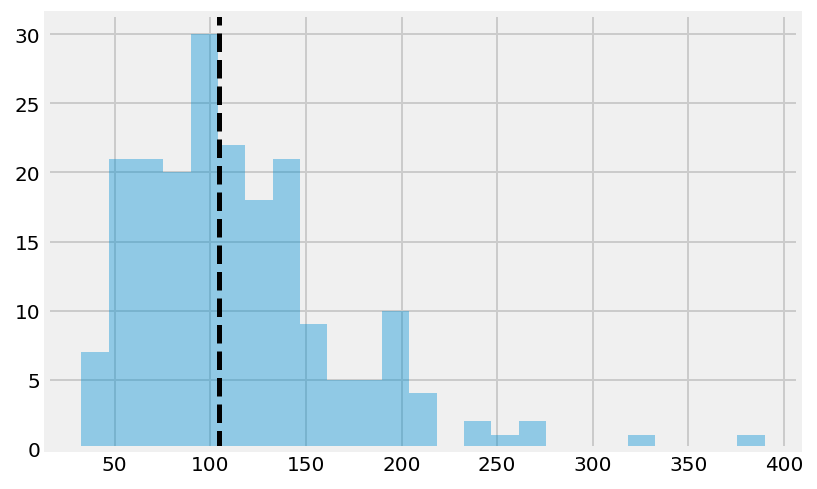

In [11]:
apm_median = np.median(apm)
ax = sns.distplot(apm, bins=25, kde=False)
ax.axvline(apm_median, lw=2.5, ls='dashed', color='black')

#### Calculating a 99% confidence interval for the median to computed with the formula above.

#### The associated z-score magnitude is 2.576

In [12]:
se_mean = np.std(apm)/np.sqrt(len(apm))
se_median = se_mean*1.2533

apm_med_lower = np.median(apm) - 2.576*se_median
apm_med_upper = np.median(apm) + 2.576*se_median

print(apm_med_lower, np.median(apm), apm_med_upper)

92.16768213849187 104.3922 116.61671786150814


In [18]:
med_boot = bootstrap(apm, np.median)

med_boot_lower = stats.scoreatpercentile(med_boot, 0.5)
med_boot_upper = stats.scoreatpercentile(med_boot, 99.5)

print(med_boot_lower, np.median(apm), med_boot_upper)

96.2449095 104.3922 115.29730649999999


#### Plotting the bootstrapped confidence interval

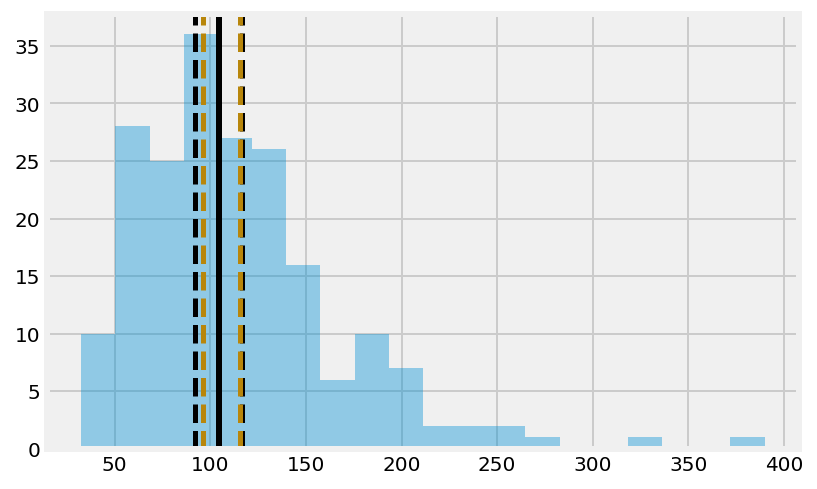

In [19]:
ax = sns.distplot(apm, bins=20, kde=False)
ax.axvline(np.median(apm), lw=3, color='black')
ax.axvline(apm_med_lower, lw=2.5, color='black', ls='dashed')
ax.axvline(apm_med_upper, lw=2.5, color='black', ls='dashed')
ax.axvline(med_boot_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(med_boot_upper, lw=2.5, color='darkgoldenrod', ls='dashed')

## Bootstrapping the confidence interval of the correlation coefficient

In [20]:
age = star.Age.values

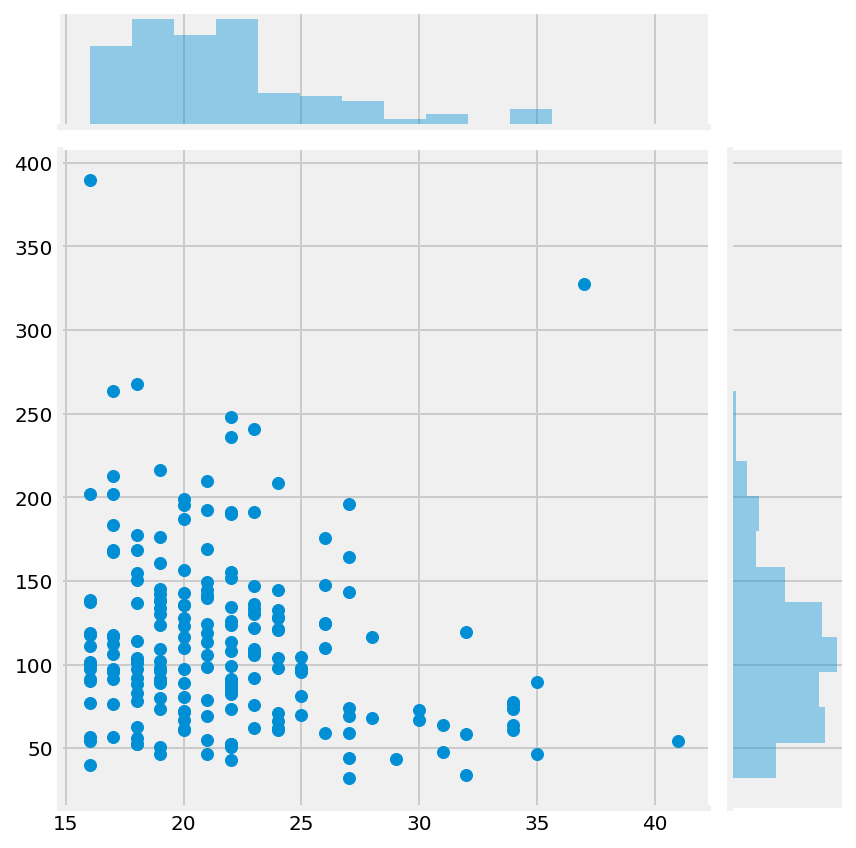

In [21]:
sns.jointplot(age, apm)

In [22]:
r = stats.pearsonr(age, apm)[0]
print(r)

-0.17782426342111127


In [23]:
def bootstrap_r(x, y, iterations=1000):
    boot_r = []
    inds = list(range(len(x)))
    for i in range(iterations):
        boot_inds = np.random.choice(inds, replace=True, size=len(inds))
        x_b = x[boot_inds]
        y_b = y[boot_inds]
        boot_r.append(stats.pearsonr(x_b, y_b)[0])
    return boot_r

In [24]:
r_boots = bootstrap_r(age, apm)

# 95%
lower = stats.scoreatpercentile(r_boots, 2.5)
upper = stats.scoreatpercentile(r_boots, 97.5)

print(lower, r, upper)

-0.3416842458185842 -0.17782426342111127 0.03455158549972645


In [25]:
# 99% confidence interval:
lower = stats.scoreatpercentile(r_boots, 0.5)
upper = stats.scoreatpercentile(r_boots, 99.5)

print(lower, r, upper)

-0.3841220821371599 -0.17782426342111127 0.11979244061023792


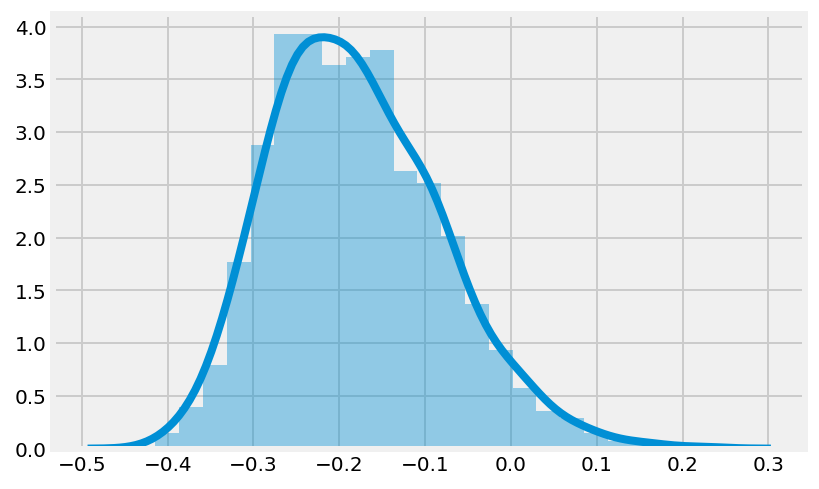

In [26]:
sns.distplot(r_boots)